In [1]:
from IPython.display import HTML

# Analysis of WeRateDogs (TM)
## By Adrien Viani

WeRateDogs is a satirical Twitter account that rates peoples dogs in a humorous way. WeRateDogs has developed a language in it's tweets that is entertaining and relatable, which has contributed to its massive popularity. Ratings issued by WeRateDogs are typically higher than 10/10, a trend that had some people, particularly ones named "Brent" up in arms due to the rating values sheer absurdity.
<br>
WeRateDogs has downloaded their twitter archive and sent it to Udacity; Now that I have gathered the data, assessed some (but not all) issues with it, and cleaned it I  will present some visualization and insight into the WeRateDogs' tweets.
<br>

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw python code for this write up is hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
# Import the clean dataset into dataframe
master_df = pd.read_csv('twitter_archive_master.csv',sep = '\t')
master_df['tweet_id'] = master_df['tweet_id'].astype(object)
master_df['timestamp'] = pd.to_datetime(master_df.timestamp)
master_df['source'] = master_df['source'].astype('category')
master_df['dog_stage'] = master_df['dog_stage'].astype('category')

### Basic Info and Descriptive Statistics

My analysis will primarily be focused favorites, retweets, and "dog stages" For some basic info on each each element I'll print a summary table below. Average favorite and retweet counts are approximately 8896 and 2767 respectively. Average quality is 12.237, giving credence to the "absurdly" high quality ratings mentioned above. Finally, there is a striking max numerator value of 1776. Fear not though, it is linked to a 4th of July post about the "America af" dog Atticus...

In [5]:
master_df[['favorite_count','retweet_count','rating_numerator']].describe()

,favorite_count,retweet_count,rating_numerator
count,1994.000000,1994.000000,1994.000000
mean,8895.725677,2766.753260,12.237101
std,12213.193181,4674.698447,41.471197
min,81.000000,16.000000,0.000000
25%,1982.000000,624.750000,10.000000
50%,4136.000000,1359.500000,11.000000
75%,11308.000000,3220.000000,12.000000
max,132810.000000,79515.000000,1776.000000


### Favorites and Retweets

It is clear from the plot below that retweets are positively correlated with favorites. One can identify a slightly parabolic and or increasingly variable relationship between retweets and favorites as favorites grows. This relationship makes sense because people are more likely to favorite than to retweet content. 

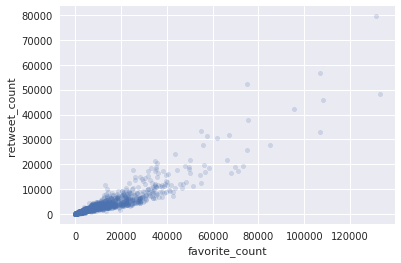

In [6]:
master_df.plot(x='favorite_count', y = 'retweet_count', kind = 'scatter', alpha = .20);

We can confirm the idea that favorites happen more readily than retweets by looking at histograms of both counts overlaid in the same graph. We can see that both distributions are right skewd, but that the tail of favorites is much fatter than retweets.

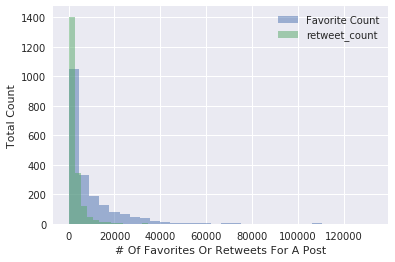

In [7]:
plt.hist(master_df['favorite_count'], bins = 30,alpha =.5,label = 'Favorite Count')
plt.hist(master_df['retweet_count'], bins = 30,alpha =.5,label = 'retweet_count')
plt.xlabel('# Of Favorites Or Retweets For A Post')
plt.ylabel('Total Count')
plt.legend()
plt.show()

###Dog Stages and Popularity

WeRateDogs has evolved a specialized language to describe various dogs and their personality or appearance.For the purposes, of our analyses we will not consider none as it implies there was no dog stage given in the text. We can see below that pupper is the most seen nomenclature by far from the value counts table and the bar chart. It may be of interest to explore dog stages by quality and see if the most frequent dog stage is also the "highest quality."

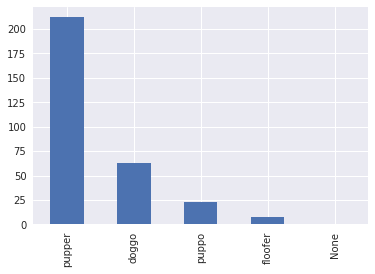

In [8]:
master_df[master_df['dog_stage']!='None']['dog_stage'].value_counts().plot(kind='bar')

In [9]:
master_df['dog_stage'].value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

Surprisingly, pupper has the lowest median and mean quality when examining the box plot and mean value chart below. It appears the other dog stages have similar medians, but puppo has a higher mean quality rating.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Rating (Numerator)')

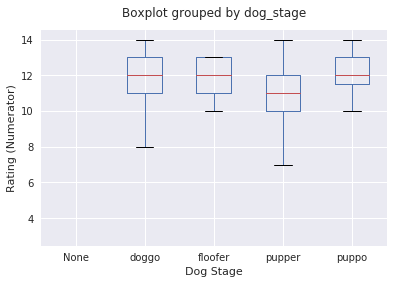

In [10]:
df_master_ds = master_df[master_df['dog_stage'] != 'None']
df_master_ds.boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')
plt.xlabel('Dog Stage')
plt.ylabel('Rating (Numerator)')

In [11]:
master_df.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None       12.453501
doggo      11.888889
floofer    11.875000
pupper     10.652217
puppo      12.043478
Name: rating_numerator, dtype: float64